# OMEGA-Py Band depth computation & Overplotting

### Load the module

In [1]:
import omegapy.omega_data as od
import omegapy.omega_plots as op
import omegapy.useful_functions as uf

import numpy as np

### Set the paths for folders containing OMEGA files

In [2]:
#od.set_omega_bin_path("/home/astcherbinine/science/OMEGA/data/OMEGAdata/binaries/")
#od.set_omega_py_path("/home/astcherbinine/science/OMEGA/data/OMEGAdata/")
od.set_omega_bin_path("./data/user/psa_psa01_pps_marsexpress/MEX-M-OMEGA*/DATA/")

### Load data and apply corrections

In [3]:
# Load the data cube
omega0 = od.OMEGAdata('0979_2')
# Apply thermal and atmospheric corrections
omega = od.corr_therm_atm(omega0, npool=15)     # Adjust npool according to your system


Computing OMEGA observation ORB0979_2
core:        128     352     412  cbyte:       2
suffix:        1       7       0  sbyte:       4
        0 or less IR:   171022
 negative pixels VIS:        9
anomalous pixels VIS:        4
saturated pixels VIS:        4
          spikes VIS:    45573

Computing data extraction and correction... [done]


Thermal & Atmospheric corrections: 100%|█████████████████████████| 52736/52736 [00:48<00:00, 1090.17it/s]


### Compute the data mask

In [4]:
mask = od.omega_mask(
    omega, 
    hide_128=True, 
    emer_lim=10, 
    inci_lim=70, 
    tempc_lim=-194, 
    limsat_c=500
    )

### Display surface reflectance

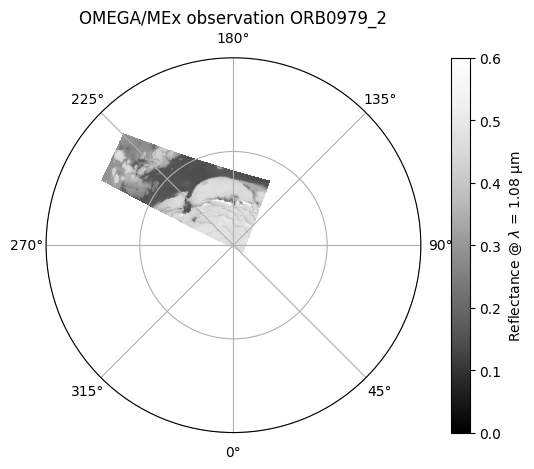

In [11]:
op.show_omega_v2(omega, lam=1.085, polar=True, vmin=0, vmax=0.6)

### Compute 1.5 μm band depth

In [6]:
bd_15 = od.BD_omega(omega, [1.5, 1.51], 1.30, 1.71, norm=True)

### Display 1.5 μm BD map

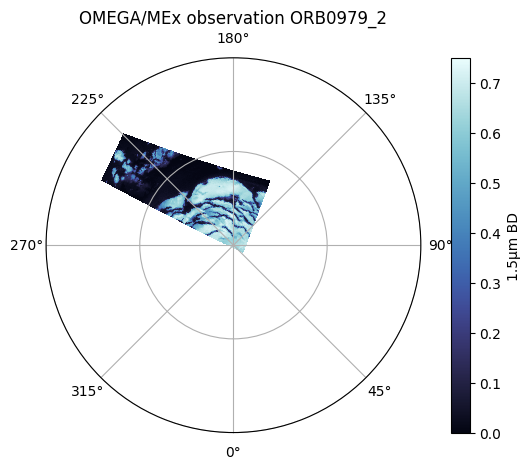

In [7]:
import cmocean.cm as cmo

op.show_data_v2(omega, data=bd_15, cb_title="1.5μm BD", polar=True, cmap=cmo.ice, vmin=0, vmax=0.75)

## Overplot BD over reflectance

In [8]:
mask_bd15 = np.ones(bd_15.shape)    # Initialisation with array of 1
mask_bd15[bd_15 < 0.1] = np.nan     # NaN for the pixels with no ice that we want to hide

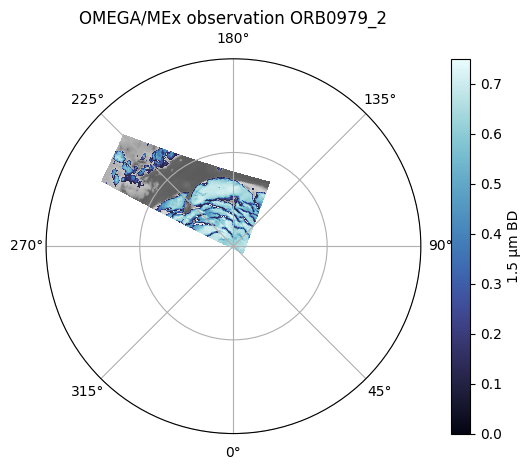

In [9]:
# Display basemap (reflectance)
op.show_omega_v2(
    omega,
    lam = 1.085,
    polar = True,
    vmin = 0,
    vmax = 0.5,
    cbar = False,   # We don't want to display the colorbar for the reflectance background
    Nfig = 1,       # int or str
    )

# Plot 1.5μm BD over the reflectance, with mask to hide pixels with BD < 0.1
op.show_data_v2(
    omega,
    data = bd_15,
    mask = mask_bd15,
    polar = True,
    cmap = cmo.ice,
    cb_title = "1.5 μm BD",
    vmin = 0,
    vmax = 0.75,
    Nfig = 1,       # int or str - same as for the background
    )